In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load the dataset from GitHub
data_url = 'https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv'
housing_data = pd.read_csv(data_url)
dataset_length = len(housing_data)

# Columns to be converted from 'Yes'/'No' to binary
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Function to map binary values
def map_binary(column):
    return column.map({'yes': 1, 'no': 0})

# Apply the mapping function to the specified columns
housing_data[binary_columns] = housing_data[binary_columns].apply(map_binary)
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [79]:
# Drop the 'furnishingstatus' column
housing_data = housing_data.drop(columns="furnishingstatus")
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [83]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split the dataset into training and testing sets
np.random.seed(0)
train_data, test_data = train_test_split(housing_data, train_size=0.8, test_size=0.2)
train_data.shape


(436, 12)

In [85]:
# Select numerical columns for training
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
train_features = train_data[numerical_columns]
test_features = test_data[numerical_columns]
# Display shape of training data
train_features.shape

(436, 6)

In [87]:
# Split features and target variable
y_train = train_features.values[:, 0]
X_train = train_features.values[:, 1:]
y_test = test_features.values[:, 0]
X_test = test_features.values[:, 1:]
X_train.shape


(436, 5)

In [89]:
# Add a column of ones to the features matrix for the bias term
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
# Initialize theta
theta = np.zeros(X_train_bias.shape[1])
y_train.shape

(436,)

In [91]:
def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = predictions - y
    squared_errors = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

def gradient_descent(X_train, X_test, y_train, y_test, theta, alpha, iterations, m):
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        gradient = (alpha / m) * X_train.T.dot(errors)
        theta -= gradient
        train_cost_history[i] = compute_cost(X_train, y_train, theta, m)
        test_cost_history[i] = compute_cost(X_test, y_test, theta, m)
        
    return theta, train_cost_history, test_cost_history

# Set hyperparameters
iterations = 10000
alpha = 1e-9

# Run gradient descent
theta, train_cost, test_cost = gradient_descent(X_train_bias, X_test_bias, y_train, y_test, theta, alpha, iterations, len(y_train))

print('Optimized theta:', theta)
print('Final training cost:', train_cost[-1])
print('Final testing cost:', test_cost[-1])

Optimized theta: [  3.56167838 861.02448195  13.77511818   7.69640764  11.86137063
   3.44366255]
Final training cost: 1704574991332.3865
Final testing cost: 387655140010.8145


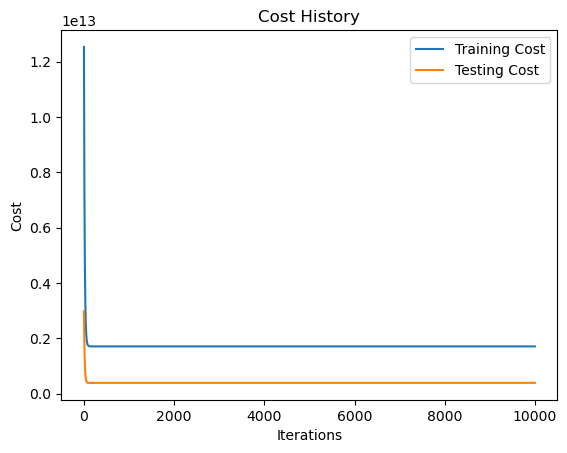

In [93]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.plot(train_cost, label="Training Cost")
plt.plot(test_cost, label="Testing Cost")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.legend()
plt.show()

In [95]:
# Reload and process the dataset again for consistency
housing_data = pd.read_csv(data_url)
housing_data.head()
dataset_length = len(housing_data)
train_data, test_data = train_test_split(housing_data, train_size=0.8, test_size=0.2)
train_data.shape
train_features = train_data[numerical_columns]
test_features = test_data[numerical_columns]
train_features.head()

,price,area,bedrooms,bathrooms,stories,parking
267,4403000,4920,3,1,2,1
336,3920000,8080,3,1,1,2
202,4900000,4120,2,1,1,1
339,3885000,3180,4,2,2,0
103,6195000,6350,3,2,3,0


In [97]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
train_features[numerical_columns] = scaler.fit_transform(train_features[numerical_columns])
test_features[numerical_columns] = scaler.fit_transform(test_features[numerical_columns])
train_features.head()

,price,area,bedrooms,bathrooms,stories,parking
267,0.229697,0.222069,0.4,0.0,0.333333,0.333333
336,0.187879,0.440000,0.4,0.0,0.000000,0.666667
202,0.272727,0.166897,0.2,0.0,0.000000,0.333333
339,0.184848,0.102069,0.6,0.5,0.333333,0.000000
103,0.384848,0.320690,0.4,0.5,0.666667,0.000000


In [99]:
# Split the normalized features and target variable
y_train_norm = train_features.values[:, 0]
X_train_norm = train_features.values[:, 1:]
y_test_norm = test_features.values[:, 0]
X_test_norm = test_features.values[:, 1:]

# Add a column of ones to the normalized features matrix
X_train_norm_bias = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm_bias = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

theta = np.zeros(X_train_norm_bias.shape[1])
y_train_norm.shape

(436,)

In [193]:
# Define the cost and gradient descent functions
def compute_cost_normalized(X, y, theta, m):
    predictions = X.dot(theta)
    errors = predictions - y
    squared_errors = errors ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

def gradient_descent_normalized(X_train, X_test, y_train, y_test, theta, alpha, iterations, m):
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = predictions - y_train
        gradient = (alpha / m) * X_train.T.dot(errors)
        theta -= gradient
        train_cost_history[i] = compute_cost_normalized(X_train, y_train, theta, m)
        test_cost_history[i] = compute_cost_normalized(X_test, y_test, theta, m)
        
    return theta, train_cost_history, test_cost_history

# Set hyperparameters
iterations = 5000
alpha = 0.01

# Run gradient descent on normalized data
theta, train_cost_norm, test_cost_norm = gradient_descent_normalized(X_train_norm_bias, X_test_norm_bias, y_train_norm, y_test_norm, theta, alpha, iterations, len(y_train_norm))

print('Optimized theta:', theta)
print('Final training cost (normalized):', train_cost_norm[-1])
print('Final testing cost (normalized):', test_cost_norm[-1])


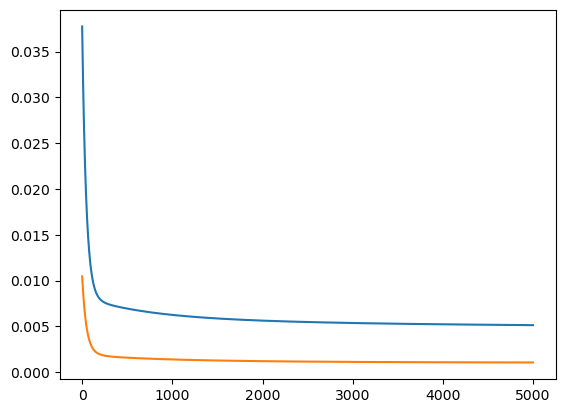

In [197]:
# Plot the cost history for normalized data
plt.plot(train_cost_norm, label="Training Cost (Normalized)")
plt.plot(test_cost_norm, label="Testing Cost (Normalized)")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History (Normalized)')
plt.legend()
plt.show()

In [101]:
# Reload the dataset again for consistency
housing_data = pd.read_csv(data_url)
housing_data.head()
dataset_length = len(housing_data)
train_data, test_data = train_test_split(housing_data, train_size=0.8, test_size=0.2)
train_data.shape

(436, 13)

In [201]:
# Select numerical columns again
train_features = train_data[numerical_columns]
test_features = test_data[numerical_columns]
train_features.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [103]:
warnings.filterwarnings('ignore')

# Normalize the features again
scaler = MinMaxScaler()
train_features[numerical_columns] = scaler.fit_transform(train_features[numerical_columns])
test_features[numerical_columns] = scaler.fit_transform(test_features[numerical_columns])
train_features.head()

,price,area,bedrooms,bathrooms,stories,parking
267,0.229697,0.222069,0.4,0.0,0.333333,0.333333
336,0.187879,0.440000,0.4,0.0,0.000000,0.666667
202,0.272727,0.166897,0.2,0.0,0.000000,0.333333
339,0.184848,0.102069,0.6,0.5,0.333333,0.000000
103,0.384848,0.320690,0.4,0.5,0.666667,0.000000


In [105]:
# Split the normalized features and target variable again
y_train_norm = train_features.values[:, 0]
X_train_norm = train_features.values[:, 1:]
y_test_norm = test_features.values[:, 0]
X_test_norm = test_features.values[:, 1:]

# Add a column of ones to the normalized features matrix again
X_train_norm_bias = np.hstack((np.ones((X_train_norm.shape[0], 1)), X_train_norm))
X_test_norm_bias = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))

theta = np.zeros(X_train_norm_bias.shape[1])
y_train_norm.shape

(436,)